### 1. Import the Libraries, Load and prepare the dataset for binary classification.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold

In [2]:
# Load the dataset
df=pd.read_csv('breast-cancer.csv')

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_w

In [4]:
# Checking number of missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Display the summary of the dataset
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

In [6]:
# Clean the dataset by dropping irrelevant information
df.drop(['id'], axis=1, inplace=True)

In [7]:
# Convert categorical data to numerical data
# Label Encoding
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
# Select features and target
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [10]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.Train SVM with linear and RBF kernel.

In [12]:
# Train SVM with Linear Kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_test_scaled)

In [13]:
print("\nLinear SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))


Linear SVM Confusion Matrix:
[[72  0]
 [ 4 38]]


In [14]:
print("\nLinear SVM Report:")
print(classification_report(y_test, y_pred_linear))


Linear SVM Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [15]:
# Train SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svm.predict(X_test_scaled)

In [16]:
print("\nRBF SVM Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_rbf))


RBF SVM Confusion Matrix:
[[72  0]
 [ 3 39]]


In [17]:
print("\nRBF SVM Report:")
print(classification_report(y_test, y_pred_rbf))


RBF SVM Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### 3. Visualize Decision Boundary (Using 2D Data)

Visualizing decision boundaries helps to understand how the model separates different classes. The dataset has 30 features so we’ll reduce it to 2 dimensions by selecting just two features for visualization.

#### a. Selecting only the first two features

In [18]:
#Select two feature columns for visualization
X_2d = X_train_scaled[:,:2] #Selecting only the first two features

In [19]:
# Train SVM with linear and RBF kernel using 2D dataset
svm_linear_2d = SVC(kernel='linear', C=1.0).fit(X_2d, y_train)
svm_rbf_2d = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_2d, y_train)

In [20]:
# Define function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['blue', 'red']), edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

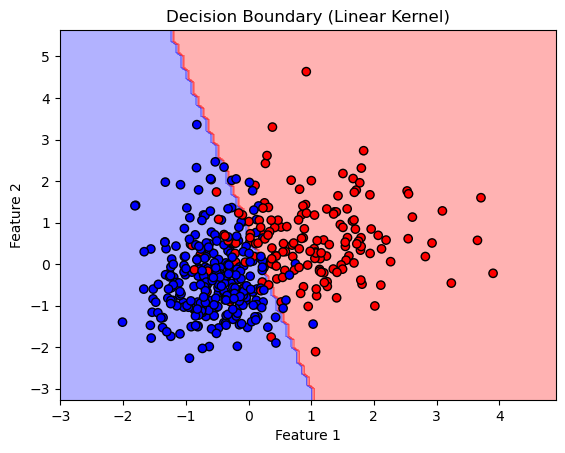

In [21]:
# Plot decision boundary for Linear SVM
plot_decision_boundary(svm_linear_2d, X_2d, y_train, "Decision Boundary (Linear Kernel)")

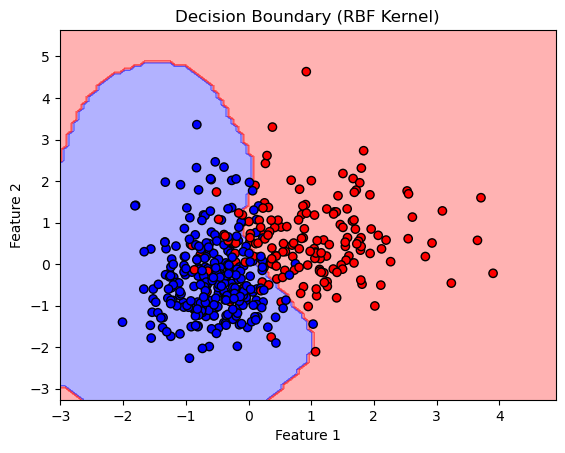

In [22]:
# Plot decision boundary for RBF SVM
plot_decision_boundary(svm_rbf_2d, X_2d, y_train, "Decision Boundary (RBF Kernel)")

#### b. Applying PCA

In [23]:
# Assume X is our scaled feature matrix
# y is the encoded label vector

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

In [24]:
# Train SVM with linear and RBF kernel using 2D dataset
svm_linear_PCA = SVC(kernel='linear', C=1.0).fit(X_pca, y_train)
svm_rbf_PCA = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_pca, y_train)

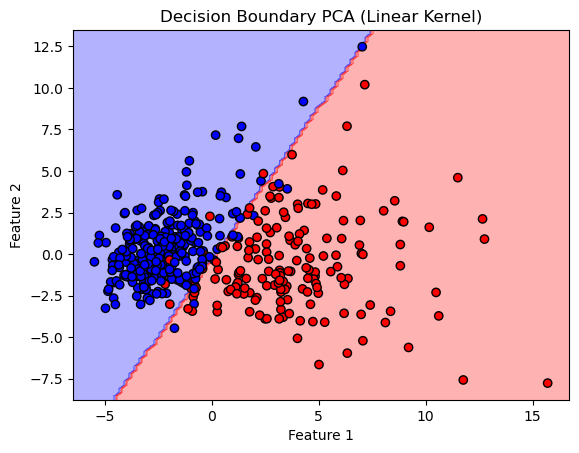

In [25]:
# Plot decision boundary for Linear SVM
plot_decision_boundary(svm_linear_PCA, X_pca, y_train, "Decision Boundary PCA (Linear Kernel)")

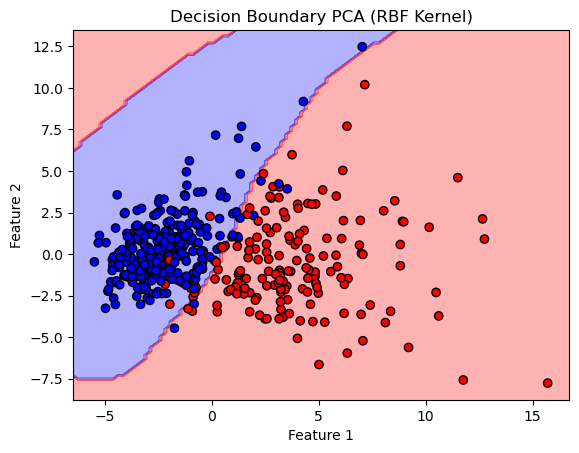

In [26]:
# Plot decision boundary for RBF SVM
plot_decision_boundary(svm_rbf_PCA, X_pca, y_train, "Decision Boundary PCA (RBF Kernel)")

In [27]:
# Principal Component 1 (PC1) is the axis that captures the most variance across all 30 features.
# Principal Component 2 (PC2) captures the second-most variance, in a direction orthogonal to PC1.

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.44593522 0.18545255]
Total variance captured: 0.6313877765595591


#### c. Applying t-SNE

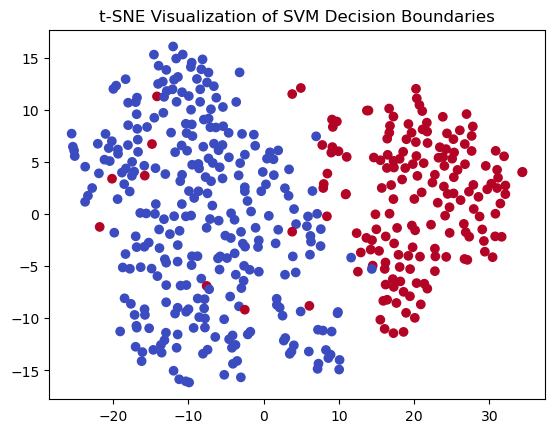

In [28]:
X_tsne = TSNE(n_components=2).fit_transform(X_train_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap="coolwarm")
plt.title("t-SNE Visualization of SVM Decision Boundaries")
plt.show()

### 4. Tune Hyperparameters (C and Gamma)

In [29]:
C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 0.1, 1, 10]
accuracy_scores = []

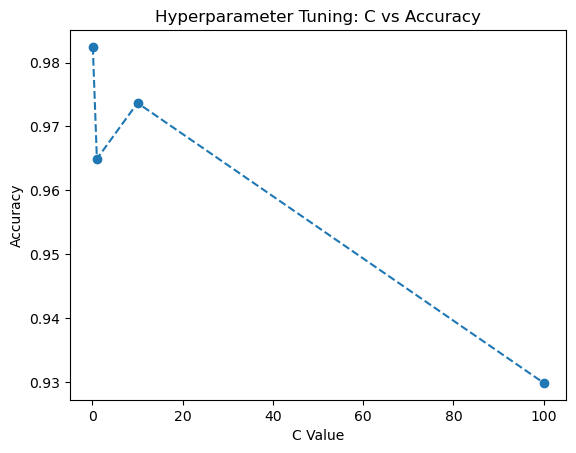

In [30]:
# Tune hyperparameter C
for C in C_values:
    svm_tuned = SVC(kernel='linear', C=C)
    svm_tuned.fit(X_train_scaled, y_train)
    y_pred_tuned = svm_tuned.predict(X_test_scaled)
    accuracy = np.mean(y_pred_tuned == y_test)
    accuracy_scores.append(accuracy)

plt.plot(C_values, accuracy_scores, marker='o', linestyle='--')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning: C vs Accuracy')
plt.show()

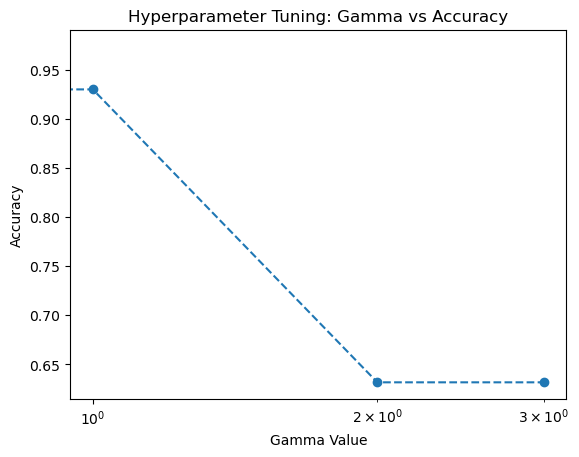

In [31]:
# Tune Gamma for RBF Kernel
accuracy_scores_gamma = []
for gamma in gamma_values:
    svm_tuned_rbf = SVC(kernel='rbf', C=1, gamma=gamma)
    svm_tuned_rbf.fit(X_train_scaled, y_train)
    y_pred_tuned_rbf = svm_tuned_rbf.predict(X_test_scaled)
    accuracy_gamma = np.mean(y_pred_tuned_rbf == y_test)
    accuracy_scores_gamma.append(accuracy_gamma)

plt.plot(gamma_values, accuracy_scores_gamma, marker='o', linestyle='--')
plt.xlabel('Gamma Value')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning: Gamma vs Accuracy')
plt.xscale('log')
plt.show()

### 5. Evaluate Model Performance Using Cross-Validation

In [36]:
# Perform cross-validation on SVM with RBF kernel
svm_final_rbf = SVC(kernel='rbf', C=1, gamma='scale')
rbf_cross_val_scores = cross_val_score(svm_final_rbf, X_train, y_train, cv=5)

print("Cross-validation scores:", rbf_cross_val_scores)
print("Mean accuracy:", np.mean(rbf_cross_val_scores))

Cross-validation scores: [0.93406593 0.95604396 0.87912088 0.92307692 0.89010989]
Mean accuracy: 0.9164835164835164


In [37]:
# Perform cross-validation on SVM with Linear kernel
svm_final_linear = SVC(kernel='linear', C=1, gamma='scale')
linear_cross_val_scores = cross_val_score(svm_final_linear, X_train, y_train, cv=5)

print("Cross-validation scores:", linear_cross_val_scores)
print("Mean accuracy:", np.mean(linear_cross_val_scores))

Cross-validation scores: [0.97802198 0.97802198 0.95604396 0.93406593 0.95604396]
Mean accuracy: 0.9604395604395604


In [38]:
# Improve cross-validation using Stratified K-Fold (rbf)
cv = StratifiedKFold(n_splits=5)
rbf_cross_val_scores = cross_val_score(SVC(kernel="rbf"), X_train_scaled, y_train, cv=cv)

print("Stratified Cross-Validation Scores:", rbf_cross_val_scores)
print("Mean Accuracy:", rbf_cross_val_scores.mean())

Stratified Cross-Validation Scores: [0.96703297 1.         0.96703297 0.96703297 0.97802198]
Mean Accuracy: 0.9758241758241759


In [39]:
# Improve cross-validation using Stratified K-Fold (linear)
cv = StratifiedKFold(n_splits=5)
Linear_cross_val_scores = cross_val_score(SVC(kernel="linear"), X_train_scaled, y_train, cv=cv)

print("Stratified Cross-Validation Scores:", linear_cross_val_scores)
print("Mean Accuracy:", linear_cross_val_scores.mean())

Stratified Cross-Validation Scores: [0.97802198 0.97802198 0.95604396 0.93406593 0.95604396]
Mean Accuracy: 0.9604395604395604
